In [11]:
import numpy as np
import re
import random

def createVocabList(dataSet):
    vocabSet = set([])  
    for document in dataSet:
        vocabSet = vocabSet | set(document)  
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList)               
    for word in inputSet:                          
        if word in vocabList:                      
            returnVec[vocabList.index(word)] = 1
        else:
            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec        

def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0] * len(vocabList)  
    for word in inputSet:             
        if word in vocabList:         
            returnVec[vocabList.index(word)] += 1
    return returnVec  

def trainNB0(trainMatrix, trainCategory):
    numTrainDocs = len(trainMatrix)  
    numWords = len(trainMatrix[0])  
    pAbusive = sum(trainCategory) / float(numTrainDocs)  
    p0Num = np.ones(numWords)
    p1Num = np.ones(numWords)  
    p0Denom = 2.0
    p1Denom = 2.0  
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:  
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:  
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = np.log(p1Num / p1Denom)
    p0Vect = np.log(p0Num / p0Denom)   
    return p0Vect, p1Vect, pAbusive  

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    
    p1=sum(vec2Classify*p1Vec)+np.log(pClass1)
    p0=sum(vec2Classify*p0Vec)+np.log(1.0-pClass1)
    if p1 > p0:
        return 1
    else:
        return 0

def textParse(bigString):  
    listOfTokens = re.split(r'\W*', bigString)  
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]  

def lieTest():
    docList = []
    classList = []
    fullText = []
    for i in range(1, 98):  
        wordList = textParse(open('C:/Users/hp 850/Desktop/lie/%d.txt' % i, 'r').read())  
        docList.append(wordList)
        fullText.append(wordList)
        classList.append(1)  
        wordList = textParse(open('C:/Users/hp 850/Desktop/true/%d.txt' % i, 'r').read())  
        docList.append(wordList)
        fullText.append(wordList)
        classList.append(0)  
    vocabList = createVocabList(docList)  
    trainingSet = list(range(50))
    testSet = []  
    for i in range(10):  
        randIndex = int(random.uniform(0, len(trainingSet)))  
        testSet.append(trainingSet[randIndex])  
        del (trainingSet[randIndex])  
    trainMat = []
    trainClasses = []  
    for docIndex in trainingSet:  
        trainMat.append(setOfWords2Vec(vocabList, docList[docIndex]))  
        trainClasses.append(classList[docIndex])  
    p0V, p1V, pLie = trainNB0(np.array(trainMat), np.array(trainClasses))  
    errorCount = 0  
    for docIndex in testSet:  
        wordVector = setOfWords2Vec(vocabList, docList[docIndex])  
        if classifyNB(np.array(wordVector), p0V, p1V, pLie) != classList[docIndex]:  
            errorCount += 1  
            print("Misclassified test set：", docList[docIndex])
    print('Error rate：%.2f%%' % (float(errorCount) / len(testSet) * 100))


if __name__ == '__main__':
    lieTest()

Misclassified test set： []
Misclassified test set： []
Misclassified test set： []
Misclassified test set： []
Misclassified test set： []
Misclassified test set： []
Error rate：60.00%


In [ ]:
ngrams_all = {1:[], 2:[]}
for i in range(2):
    for each in tokenized_text:
        for j in ngrams(each, i+1):
            ngrams_all[i+1].append(j);
ngrams_voc = {1:set([]), 2:set([])}

for i in range(2):
    for gram in ngrams_all[i+1]:
        if gram not in ngrams_voc[i+1]:
            ngrams_voc[i+1].add(gram)

total_ngrams = {1:-1, 2:-1}
total_voc = {1:-1, 2:-1}
for i in range(2):
    total_ngrams[i+1] = len(ngrams_all[i+1])
    total_voc[i+1] = len(ngrams_voc[i+1])                       
    
ngrams_prob = {1:[], 2:[]}
for i in range(2):
    for ngram in ngrams_voc[i+1]:
        tlist = [ngram]
        tlist.append(ngrams_all[i+1].count(ngram))
        ngrams_prob[i+1].append(tlist)
    
for i in range(2):
    for ngram in ngrams_prob[i+1]:
        ngram[-1] = (ngram[-1]+1)/(total_ngrams[i+1] + total_voc[i+1])             

In [ ]:
print(ngrams_prob)

{1: [[('i',), 0.5], [('chapter',), 0.5]], 2: [[('chapter', 'i'), 1.0]]}


In [8]:
import os
import random
import jieba
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

def TextProcessing(folder_path, test_size=0.2):
    folder_list = os.listdir(folder_path)  
    data_list = []  
    class_list = []  
    for folder in folder_list:
        new_folder_path = os.path.join(folder_path, folder)  
        files = os.listdir(new_folder_path)  
        j = 1
        for file in files:
            if j > 100:  
                break
            with open(os.path.join(new_folder_path, file), 'r', encoding='utf-8') as f:  
                raw = f.read()   
            word_cut = jieba.cut(raw, cut_all=False)  
            word_list = list(word_cut)  
            data_list.append(word_list)  
            class_list.append(folder)  
            j += 1
    data_class_list = list(zip(data_list, class_list))  
    random.shuffle(data_class_list)  
    index = int(len(data_class_list) * test_size) + 1  
    train_list = data_class_list[index:]  
    test_list = data_class_list[:index]  
    train_data_list, train_class_list = zip(*train_list)  
    test_data_list, test_class_list = zip(*test_list)  
    all_words_dict = {}  
    for word_list in train_data_list:
        for word in word_list:
            if word in all_words_dict.keys():
                all_words_dict[word] += 1
            else:
                all_words_dict[word] = 1
    all_words_tuple_list = sorted(all_words_dict.items(), key=lambda f: f[1], reverse=True)
    all_words_list, all_words_nums = zip(*all_words_tuple_list)  
    all_words_list = list(all_words_list)  
    return all_words_list, train_data_list, test_data_list, train_class_list, test_class_list
def MakeWordsSet(words_file):
    words_set = set()  
    with open(words_file, 'r', encoding='utf-8') as f:  
        for line in f.readlines():  
            word = line.strip()  
            if len(word) > 0:  
                words_set.add(word)
    return words_set  
def words_dict(all_words_list, deleteN, stopwords_set=set()):
    feature_words = []  
    n = 1
    for t in range(deleteN, len(all_words_list), 1):
        if n > 1000:  
            break
        if not all_words_list[t].isdigit() and all_words_list[t] not in stopwords_set and 1 < len(all_words_list[t]) < 5:
            feature_words.append(all_words_list[t])
        n += 1
    return feature_words
def TextFeatures(train_data_list, test_data_list, feature_words):
    def text_features(text, feature_words):  
        text_words = set(text)
        features = [1 if word in text_words else 0 for word in feature_words]
        return features
    train_feature_list = [text_features(text, feature_words) for text in train_data_list]
    test_feature_list = [text_features(text, feature_words) for text in test_data_list]
    return train_feature_list, test_feature_list  
def TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list):
    classifier = MultinomialNB().fit(train_feature_list, train_class_list)
    test_accuracy = classifier.score(test_feature_list, test_class_list)
    return test_accuracy

if __name__ == '__main__': 
    folder_path = 'C:/Users/hp 850/Desktop/lietrue' 
    all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = TextProcessing(folder_path,test_size=0.2)
    stopwords_file = 'C:/Users/hp 850/Desktop/stopwords_cn.txt'
    stopwords_set = MakeWordsSet(stopwords_file)
    test_accuracy_list = []
    feature_words = words_dict(all_words_list, 450, stopwords_set)
    train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
    test_accuracy = TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list)
    test_accuracy_list.append(test_accuracy)
    ave = lambda c: sum(c) / len(c)
    print(ave(test_accuracy_list))

0.475


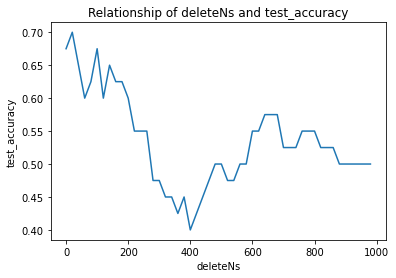

In [9]:
if __name__ == '__main__':
    folder_path = 'C:/Users/hp 850/Desktop/lietrue'  
    all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = TextProcessing(folder_path,test_size=0.2)
    stopwords_file = 'C:/Users/hp 850/Desktop/stopwords_cn.txt'
    stopwords_set = MakeWordsSet(stopwords_file)
    test_accuracy_list = []
    deleteNs = range(0, 1000, 20)  
    for deleteN in deleteNs:
        feature_words = words_dict(all_words_list, deleteN, stopwords_set)
        train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
        test_accuracy = TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list)
        test_accuracy_list.append(test_accuracy)
    plt.figure()
    plt.plot(deleteNs, test_accuracy_list)
    plt.title('Relationship of deleteNs and test_accuracy')
    plt.xlabel('deleteNs')
    plt.ylabel('test_accuracy')
    plt.show()

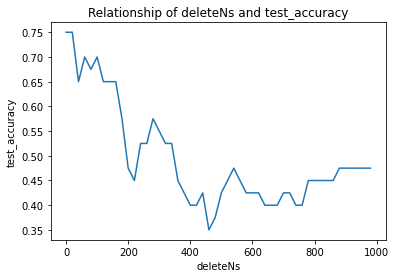

In [51]:
import numpy as np
import re
import random
import pandas as pd
from tensorflow.keras import optimizers
from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

def createVocabList(dataSet):
    vocabSet = set([])  
    for document in dataSet:
        vocabSet = vocabSet | set(document)  
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList)               
    for word in inputSet:                          
        if word in vocabList:                      
            returnVec[vocabList.index(word)] = 1
        else:
            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec        

def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0] * len(vocabList)  
    for word in inputSet:             
        if word in vocabList:         
            returnVec[vocabList.index(word)] += 1
    return returnVec  

def trainNB0(trainMatrix, trainCategory):
    numTrainDocs = len(trainMatrix)  
    numWords = len(trainMatrix[0])  
    pAbusive = sum(trainCategory) / float(numTrainDocs)  
    p0Num = np.ones(numWords)
    p1Num = np.ones(numWords)  
    p0Denom = 2.0
    p1Denom = 2.0  
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:  
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:  
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = np.log(p1Num / p1Denom)
    p0Vect = np.log(p0Num / p0Denom)   
    return p0Vect, p1Vect, pAbusive  

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    
    p1=sum(vec2Classify*p1Vec)+np.log(pClass1)
    p0=sum(vec2Classify*p0Vec)+np.log(1.0-pClass1)
    if p1 > p0:
        return 1
    else:
        return 0

def textParse(bigString):  
    listOfTokens = re.split(r'\W*', bigString)  
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]  

def lieTest():
    docList = []
    classList = []
    fullText = []
    for i in range(1, 98):  
        wordList = textParse(open('C:/Users/hp 850/Desktop/lie/%d.txt' % i, 'r').read())  
        docList.append(wordList)
        fullText.append(wordList)
        classList.append(1)  
        wordList = textParse(open('C:/Users/hp 850/Desktop/true/%d.txt' % i, 'r').read())  
        docList.append(wordList)
        fullText.append(wordList)
        classList.append(0) 
        
normalizer = Normalizer()  
def clean_data(doc):
    doc = normalizer.normalize(doc) 
    tokenized = word_tokenize(doc)  
    tokens = []
    for token in tokenized:      
      token = re.sub("[،:.,;()/+]", " ", token) 
      token = re.sub(r"\!+","!", token)
      token = re.sub(r"\؟+","؟", token)
      token = re.sub(r"\u200c", " ", token)
      token = token.lower()
      token = re.sub('<[^>]*>', '', token)
      token = re.sub('\S*@\S*\s?', '', token)
      token = re.sub('https?://[A-Za-z0-9]','',token)
      token = re.sub('[^a-zA-Z]',' ',token)
      token = re.sub(r"\'s", "", token)
      token = re.sub(r"\'ve", "", token)
      token = re.sub(r"n\'t", "", token)
      token = re.sub(r"\'re", "", token)
      token = re.sub(r"\'d", "", token)
      token = re.sub(r"\'11", "", token)
      token = re.sub(r"'", "", token)
      token = re.sub(r"\s{2,}", "", token)
      tokens.append(token)
    tokens = [w for w in tokens if not len(w) <= 1]  
    tokens = [w for w in tokens if not w.isdigit()] 
    tokens = [lemmatizer.lemmatize(w) for w in tokens] 
    tokens = [stemmer.stem(w) for w in tokens] 
    tokens = ' '.join(tokens)
    return tokens   
              
    vocabList = createVocabList(docList)  
    trainingSet = list(range(50))
    testSet = []  
    for i in range(10):  
        randIndex = int(random.uniform(0, len(trainingSet)))  
        testSet.append(trainingSet[randIndex])  
        del (trainingSet[randIndex])  
    trainMat = []
    trainClasses = []  
    for docIndex in trainingSet:  
        trainMat.append(setOfWords2Vec(vocabList, docList[docIndex]))  
        trainClasses.append(classList[docIndex])  
    p0V, p1V, pLie = trainNB0(np.array(trainMat), np.array(trainClasses))  
    errorCount = 0  
    for docIndex in testSet:  
        wordVector = setOfWords2Vec(vocabList, docList[docIndex])  
        if classifyNB(np.array(wordVector), p0V, p1V, pLie) != classList[docIndex]:  
            errorCount += 1  
            print("Misclassified test set：", docList[docIndex])
    print('Error rate：%.2f%%' % (float(errorCount) / len(testSet) * 100))


if __name__ == '__main__':
    lieTest()

if __name__ == '__main__':
    folder_path = 'C:/Users/hp 850/Desktop/lietrue'  
    all_words_list, train_data_list, test_data_list, train_class_list, test_class_list = TextProcessing(folder_path,test_size=0.2)
    stopwords_file = 'C:/Users/hp 850/Desktop/stopwords_cn.txt'
    stopwords_set = MakeWordsSet(stopwords_file)
    test_accuracy_list = []
    deleteNs = range(0, 1000, 20)  
    for deleteN in deleteNs:
        feature_words = words_dict(all_words_list, deleteN, stopwords_set)
        train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
        test_accuracy = TextClassifier(train_feature_list, test_feature_list, train_class_list, test_class_list)
        test_accuracy_list.append(test_accuracy)
    plt.figure()
    plt.plot(deleteNs, test_accuracy_list)
    plt.title('Relationship of deleteNs and test_accuracy')
    plt.xlabel('deleteNs')
    plt.ylabel('test_accuracy')
    plt.show()